In [1]:
import pandas as pd

df_train = pd.read_pickle('../data/train0.1.pkl')
df_test = pd.read_pickle('../data/test.pkl')
df_train.index = range(len(df_train))
doc_info = pd.read_pickle('../data/doc_info.pkl')
user_info = pd.read_pickle('../data/user_info.pkl')

In [2]:
del df_train['dt']
del df_train['date']
del df_train['duration']
del df_train['position']

del df_test['dt']
del df_test['date']

del doc_info['title']

In [3]:
doc_info['docid'] = doc_info['docid'].astype('int')

In [4]:
from tqdm import tqdm
words=[[],[],[],[],[]]
for i in tqdm(doc_info['keyword']):
#     print(i)
    key_one={}
#     print(key_one)
    splts = i.split(',')
    for sp in splts:
        split_=sp.split(':')
        try:
            score=float(split_[1])
            key_one[split_[0]]=score
        except:
            continue
#     print(key_one)
    key_one = sorted(key_one.items(),key = lambda x:x[1],reverse = True)
#     print(key_one)
    for i in range(5):
        try:
            key_=key_one[i][0]
#             print(key_)
            words[i].append(key_)
#             if key_ not in keywords_all:
#                 keywords_all.append(key_)
        except:
            words[i].append('_#_#_#_')

100%|██████████| 347466/347466 [00:13<00:00, 26681.93it/s]


In [5]:
keywords_all=['_#_#_#_']
print(len(keywords_all))
for i in range(5):
    keywords_all+=words[i]
print(len(keywords_all))
keywords_all=list(set(keywords_all))
print(len(keywords_all))

1
1737331
253759


In [6]:
keyword2id = dict(zip(keywords_all, range(1, len(keywords_all) + 1)))

In [7]:
for i in range(5):
    for j in tqdm(range(len(words[i]))):
        words[i][j]=keyword2id[words[i][j]]

100%|██████████| 347466/347466 [00:00<00:00, 1003889.17it/s]


In [8]:
doc_info['keyword0'] = words[0]
doc_info['keyword1'] = words[1]
doc_info['keyword2'] = words[2]
doc_info['keyword3'] = words[3]
doc_info['keyword4'] = words[4]

In [9]:
del doc_info['keyword']

In [10]:
df_train.to_pickle('../data/train2.pkl')
df_test.to_pickle('../data/test2.pkl')
doc_info.to_pickle('../data/doc_info2.pkl')
user_info.to_pickle('../data/user_info2.pkl')

In [2]:
import pandas as pd
df_train = pd.read_pickle('../data/out2/train2.pkl')
df_test = pd.read_pickle('../data/out2/test2.pkl')
doc_info = pd.read_pickle('../data/out2/doc_info2.pkl')
user_info = pd.read_pickle('../data/out2/user_info2.pkl')

In [3]:
df_train['click'].mean()

0.14485069571095685

In [4]:
df_train_user=pd.merge(df_train,user_info,on='userid')
df_train_user_doc=pd.merge(df_train_user,doc_info,on='docid')

In [5]:
df_test_user=pd.merge(df_test,user_info,on='userid')
df_test_user_doc=pd.merge(df_test_user,doc_info,on='docid')

In [6]:
df_test_user_doc.sort_values("id",inplace=True)
df_test_user_doc.index = range(len(df_test_user_doc))
del df_test_user_doc['id']

In [14]:
# from tqdm import tqdm
# import numpy as np
# for i in df_train_user_doc.columns:
#     print(i)
#     for index,j in tqdm(enumerate(df_train_user_doc[i])):
#         if np.isnan(j):
#             print(df_train_user_doc[i].mean())
#             df_train_user_doc[i][index]=df_train_user_doc[i].mean()

    

In [ ]:
# import numpy as np
# print(df_train_user_doc.describe())
# # 数据集概览
# print(df_train_user_doc.head(5))
# # 前5行


In [ ]:
# from tqdm import tqdm
# for i in tqdm(df_train_user_doc.columns):
#     print(i)
#     df_train_user_doc[i].fillna((df_train_user_doc[i].mean()), inplace=True)

In [ ]:
# for i in tqdm(df_test_user_doc.columns):
#     print(i)
#     df_test_user_doc[i].fillna((df_test_user_doc[i].mean()), inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
x_columns = [x for x in df_train_user_doc.columns if x not in ['click','dt','date','duration','position']]
X = df_train_user_doc[x_columns]      # 样本
y = df_train_user_doc['click']    # 标签

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9)


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=9)
gbm0.fit(x_train, y_train)

GradientBoostingClassifier(random_state=9)

In [18]:
from sklearn.metrics import roc_auc_score,accuracy_score
print("tr-accuracy: %.4g" % accuracy_score(y_train.values, gbm0.predict(x_train)))      # Accuracy : 0.9855
print("tr-AUC: %f" % roc_auc_score(y_train, gbm0.predict_proba(x_train)[:, 1]))      # AUC Score (Train): 0.910597

print("val-accuracy: %.4g" % accuracy_score(y_val, gbm0.predict(x_val)))      # Accuracy : 0.9825
print("val-AUC: %f" % roc_auc_score(y_val, gbm0.predict_proba(x_val)[:, 1]))      # AUC Score (Train): 0.827217

tr-accuracy: 0.8552
tr-AUC: 0.660734
val-accuracy: 0.8551
val-AUC: 0.661266


In [9]:
import joblib
# joblib.dump(gbm0, '../data/gbm2.model')
gbm0 = joblib.load('../data/out2/gbm2.model')

   feature_name  importance
4       refresh    0.799857
14  category2nd    0.081358
12       picnum    0.050726
0        userid    0.017298
11      pubtime    0.007905
9           age    0.006007
16     keyword1    0.005032
5        device    0.004865
2     timestamp    0.004820
10       gender    0.004239
7      province    0.004210
1         docid    0.004029
18     keyword3    0.003752
15     keyword0    0.002319
13  category1st    0.001550
17     keyword2    0.001151
19     keyword4    0.000440
8          city    0.000421
3       network    0.000022
6            os    0.000000


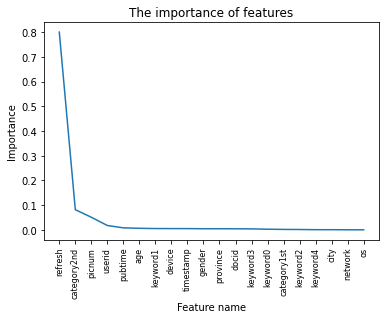

In [10]:
import matplotlib.pyplot as plt
def plot_feature_importance(dataset, model_bst):
    list_feature_name = list(dataset.columns[:])
    # list_feature_importance = list(model_bst.feature_importance(importance_type='split', iteration=-1))
    list_feature_importance = list(model_bst.feature_importances_)
    dataframe_feature_importance = pd.DataFrame(
        {'feature_name': list_feature_name, 'importance': list_feature_importance})
    dataframe_feature_importance20 = dataframe_feature_importance.sort_values(by='importance', ascending=False)[:20]
    print(dataframe_feature_importance20)
    x = range(len(dataframe_feature_importance20['feature_name']))
    plt.xticks(x, dataframe_feature_importance20['feature_name'], rotation=90, fontsize=8)
    plt.plot(x, dataframe_feature_importance20['importance'])
    plt.xlabel("Feature name")
    plt.ylabel("Importance")
    plt.title("The importance of features")
    plt.show()


# gbm6 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=7, min_samples_leaf =60,
#                    min_samples_split =1200, max_features=9, subsample=0.7, random_state=2019)

# gbm6.fit(x_train, y_train)

plot_feature_importance(x_train, gbm0)


In [20]:
x_columns_0 = [x for x in df_test_user_doc.columns if x not in ['click','dt','date','duration','position']]
X_0 = df_test_user_doc[x_columns_0]      # 样本
print(X_0[0:1])

       userid      docid      timestamp  network  refresh  device  os  \
0  2204868548  464495940  1625011774995        2        4    1479   0   

   province  city  age  gender        pubtime  picnum  category1st  \
0       224   506    2       2  1624955700000      23           11   

   category2nd  keyword0  keyword1  keyword2  keyword3  keyword4  
0           57    238360    212891     72530    211806    103819  


In [21]:
y_pre_0=gbm0.predict_proba(X_0)[:, 1]

In [22]:
import time
end=time.time()
def store_list(lsit,text_path):
    ff = open(text_path, encoding='utf-8', mode='w')
    for line_list in lsit:
        ff.write(str(line_list))  # 写入一个新文件中
        ff.write("\n")
store_list(y_pre_0,'../data/y_pre2_'+str(end)+'.txt')